In [1]:
#This is a copy in gatorade 
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source" # Select early Data Release 3 over default 1


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [13]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(1.0, u.deg)
height = u.Quantity(1.0, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r=r.to_pandas
r=pd.DataFrame(r)
print (r)



INFO: Query finished. [astroquery.utils.tap.core]


ValueError: DataFrame constructor not properly called!

In [3]:

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
#Retrieving table 'gaiadr3.gaia_source'
print(gaiadr3_table)

Retrieving table 'gaiadr3.gaia_source'
Parsing table 'gaiadr3.gaia_source'...
Done.
TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152


In [4]:
# for column in gaiadr3_table.columns:
#     print(column.name)
# GD3 = pd.DataFrame(data= gaiadr3_table)


In [5]:
Gaia_Result = pd.read_csv("Joined_GDR3_3-result.csv")
Abs_Mag = Gaia_Result["phot_g_mean_mag"] - 5*np.log10(1000/Gaia_Result["parallax"]) + 5 
Gaia_Result.loc[:,"Abs_g_Mag"]=Abs_Mag

In [6]:
Gaia_Result

,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,...,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,ag_gspphot,ebpminrp_gspphot,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,Abs_g_Mag
0,4094832952561701888,1608287703,273.819868,-18.992760,0.584085,0.032382,18.037430,0.881986,0.034261,-2.276540,...,NaN,NaN,NaN,NaN,NaN,NaN,1593.7020,1530.4814,1685.1537,-4.130746
1,4094860616496202624,41055333,273.878190,-18.661577,0.486713,0.041793,11.645685,0.757031,0.059390,-1.430601,...,NaN,NaN,NaN,NaN,NaN,NaN,1967.6772,1814.5885,2145.8552,-5.599285
2,4095006233039251200,48579871,271.495151,-19.953857,0.736577,0.025808,28.540750,-0.831539,0.030865,-2.102359,...,32524.588,3.9734,0.0013,1573.0103,1.8859,1.0348,1321.3185,1274.3121,1371.2478,-1.903721
3,4097527000879217408,186491395,272.948335,-16.893941,0.687041,0.035764,19.210485,-0.441092,0.039147,-1.409315,...,19696.768,3.3746,0.0258,1471.2677,1.1165,0.6065,1402.4916,1294.5475,1477.1261,-2.741789
4,2006083605125285760,129373255,333.747816,55.463554,0.251825,0.022807,11.041536,-3.528377,0.028350,-3.076200,...,16706.670,2.5267,-0.3435,12067.1570,1.0647,0.5794,3682.8357,3456.0625,4054.8547,-2.944480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,4084149655221372544,692482776,287.760502,-18.925154,0.255366,0.030139,8.472874,1.103443,0.032617,-6.470459,...,18130.986,3.7159,0.0142,4094.6313,0.4215,0.2273,3279.7139,2958.8074,3638.3096,-1.915622
947,4098858028450000128,1276922601,282.518827,-17.938297,1.064299,0.032222,33.029858,-2.884160,0.029612,-1.448900,...,15822.601,3.4349,0.1752,1189.6715,0.7339,0.3961,905.3542,880.3968,929.0644,-1.630206
948,368655494196328064,1591910810,10.300672,39.603778,0.573650,0.051393,11.161984,-1.262263,0.048676,-7.009857,...,NaN,NaN,NaN,NaN,NaN,NaN,1691.8151,1569.2028,1864.7726,-3.250408
949,2200044053326921088,386320129,336.265244,57.841584,0.420447,0.017173,24.483664,-2.721048,0.020659,-1.528214,...,25177.213,3.9668,0.0078,2064.3115,1.5247,0.8321,2399.9510,2335.7832,2475.1343,-1.706436


In [7]:
Abs_Mag

0     -4.130746
1     -5.599285
2     -1.903721
3     -2.741789
4     -2.944480
         ...   
946   -1.915622
947   -1.630206
948   -3.250408
949   -1.706436
950   -2.026542
Length: 951, dtype: float64

In [8]:

Gaia_Result

,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,...,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,ag_gspphot,ebpminrp_gspphot,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,Abs_g_Mag
0,4094832952561701888,1608287703,273.819868,-18.992760,0.584085,0.032382,18.037430,0.881986,0.034261,-2.276540,...,NaN,NaN,NaN,NaN,NaN,NaN,1593.7020,1530.4814,1685.1537,-4.130746
1,4094860616496202624,41055333,273.878190,-18.661577,0.486713,0.041793,11.645685,0.757031,0.059390,-1.430601,...,NaN,NaN,NaN,NaN,NaN,NaN,1967.6772,1814.5885,2145.8552,-5.599285
2,4095006233039251200,48579871,271.495151,-19.953857,0.736577,0.025808,28.540750,-0.831539,0.030865,-2.102359,...,32524.588,3.9734,0.0013,1573.0103,1.8859,1.0348,1321.3185,1274.3121,1371.2478,-1.903721
3,4097527000879217408,186491395,272.948335,-16.893941,0.687041,0.035764,19.210485,-0.441092,0.039147,-1.409315,...,19696.768,3.3746,0.0258,1471.2677,1.1165,0.6065,1402.4916,1294.5475,1477.1261,-2.741789
4,2006083605125285760,129373255,333.747816,55.463554,0.251825,0.022807,11.041536,-3.528377,0.028350,-3.076200,...,16706.670,2.5267,-0.3435,12067.1570,1.0647,0.5794,3682.8357,3456.0625,4054.8547,-2.944480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,4084149655221372544,692482776,287.760502,-18.925154,0.255366,0.030139,8.472874,1.103443,0.032617,-6.470459,...,18130.986,3.7159,0.0142,4094.6313,0.4215,0.2273,3279.7139,2958.8074,3638.3096,-1.915622
947,4098858028450000128,1276922601,282.518827,-17.938297,1.064299,0.032222,33.029858,-2.884160,0.029612,-1.448900,...,15822.601,3.4349,0.1752,1189.6715,0.7339,0.3961,905.3542,880.3968,929.0644,-1.630206
948,368655494196328064,1591910810,10.300672,39.603778,0.573650,0.051393,11.161984,-1.262263,0.048676,-7.009857,...,NaN,NaN,NaN,NaN,NaN,NaN,1691.8151,1569.2028,1864.7726,-3.250408
949,2200044053326921088,386320129,336.265244,57.841584,0.420447,0.017173,24.483664,-2.721048,0.020659,-1.528214,...,25177.213,3.9668,0.0078,2064.3115,1.5247,0.8321,2399.9510,2335.7832,2475.1343,-1.706436


<function matplotlib.pyplot.show(*args, **kw)>

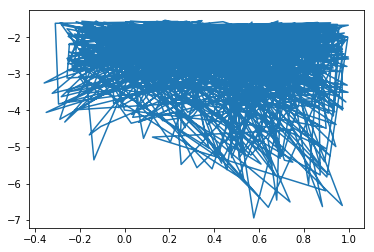

In [9]:
from matplotlib import pyplot as plt
x = Gaia_Result["bp_rp"]
y = Gaia_Result["Abs_g_Mag"]
plt.plot(x,y)
plt.show

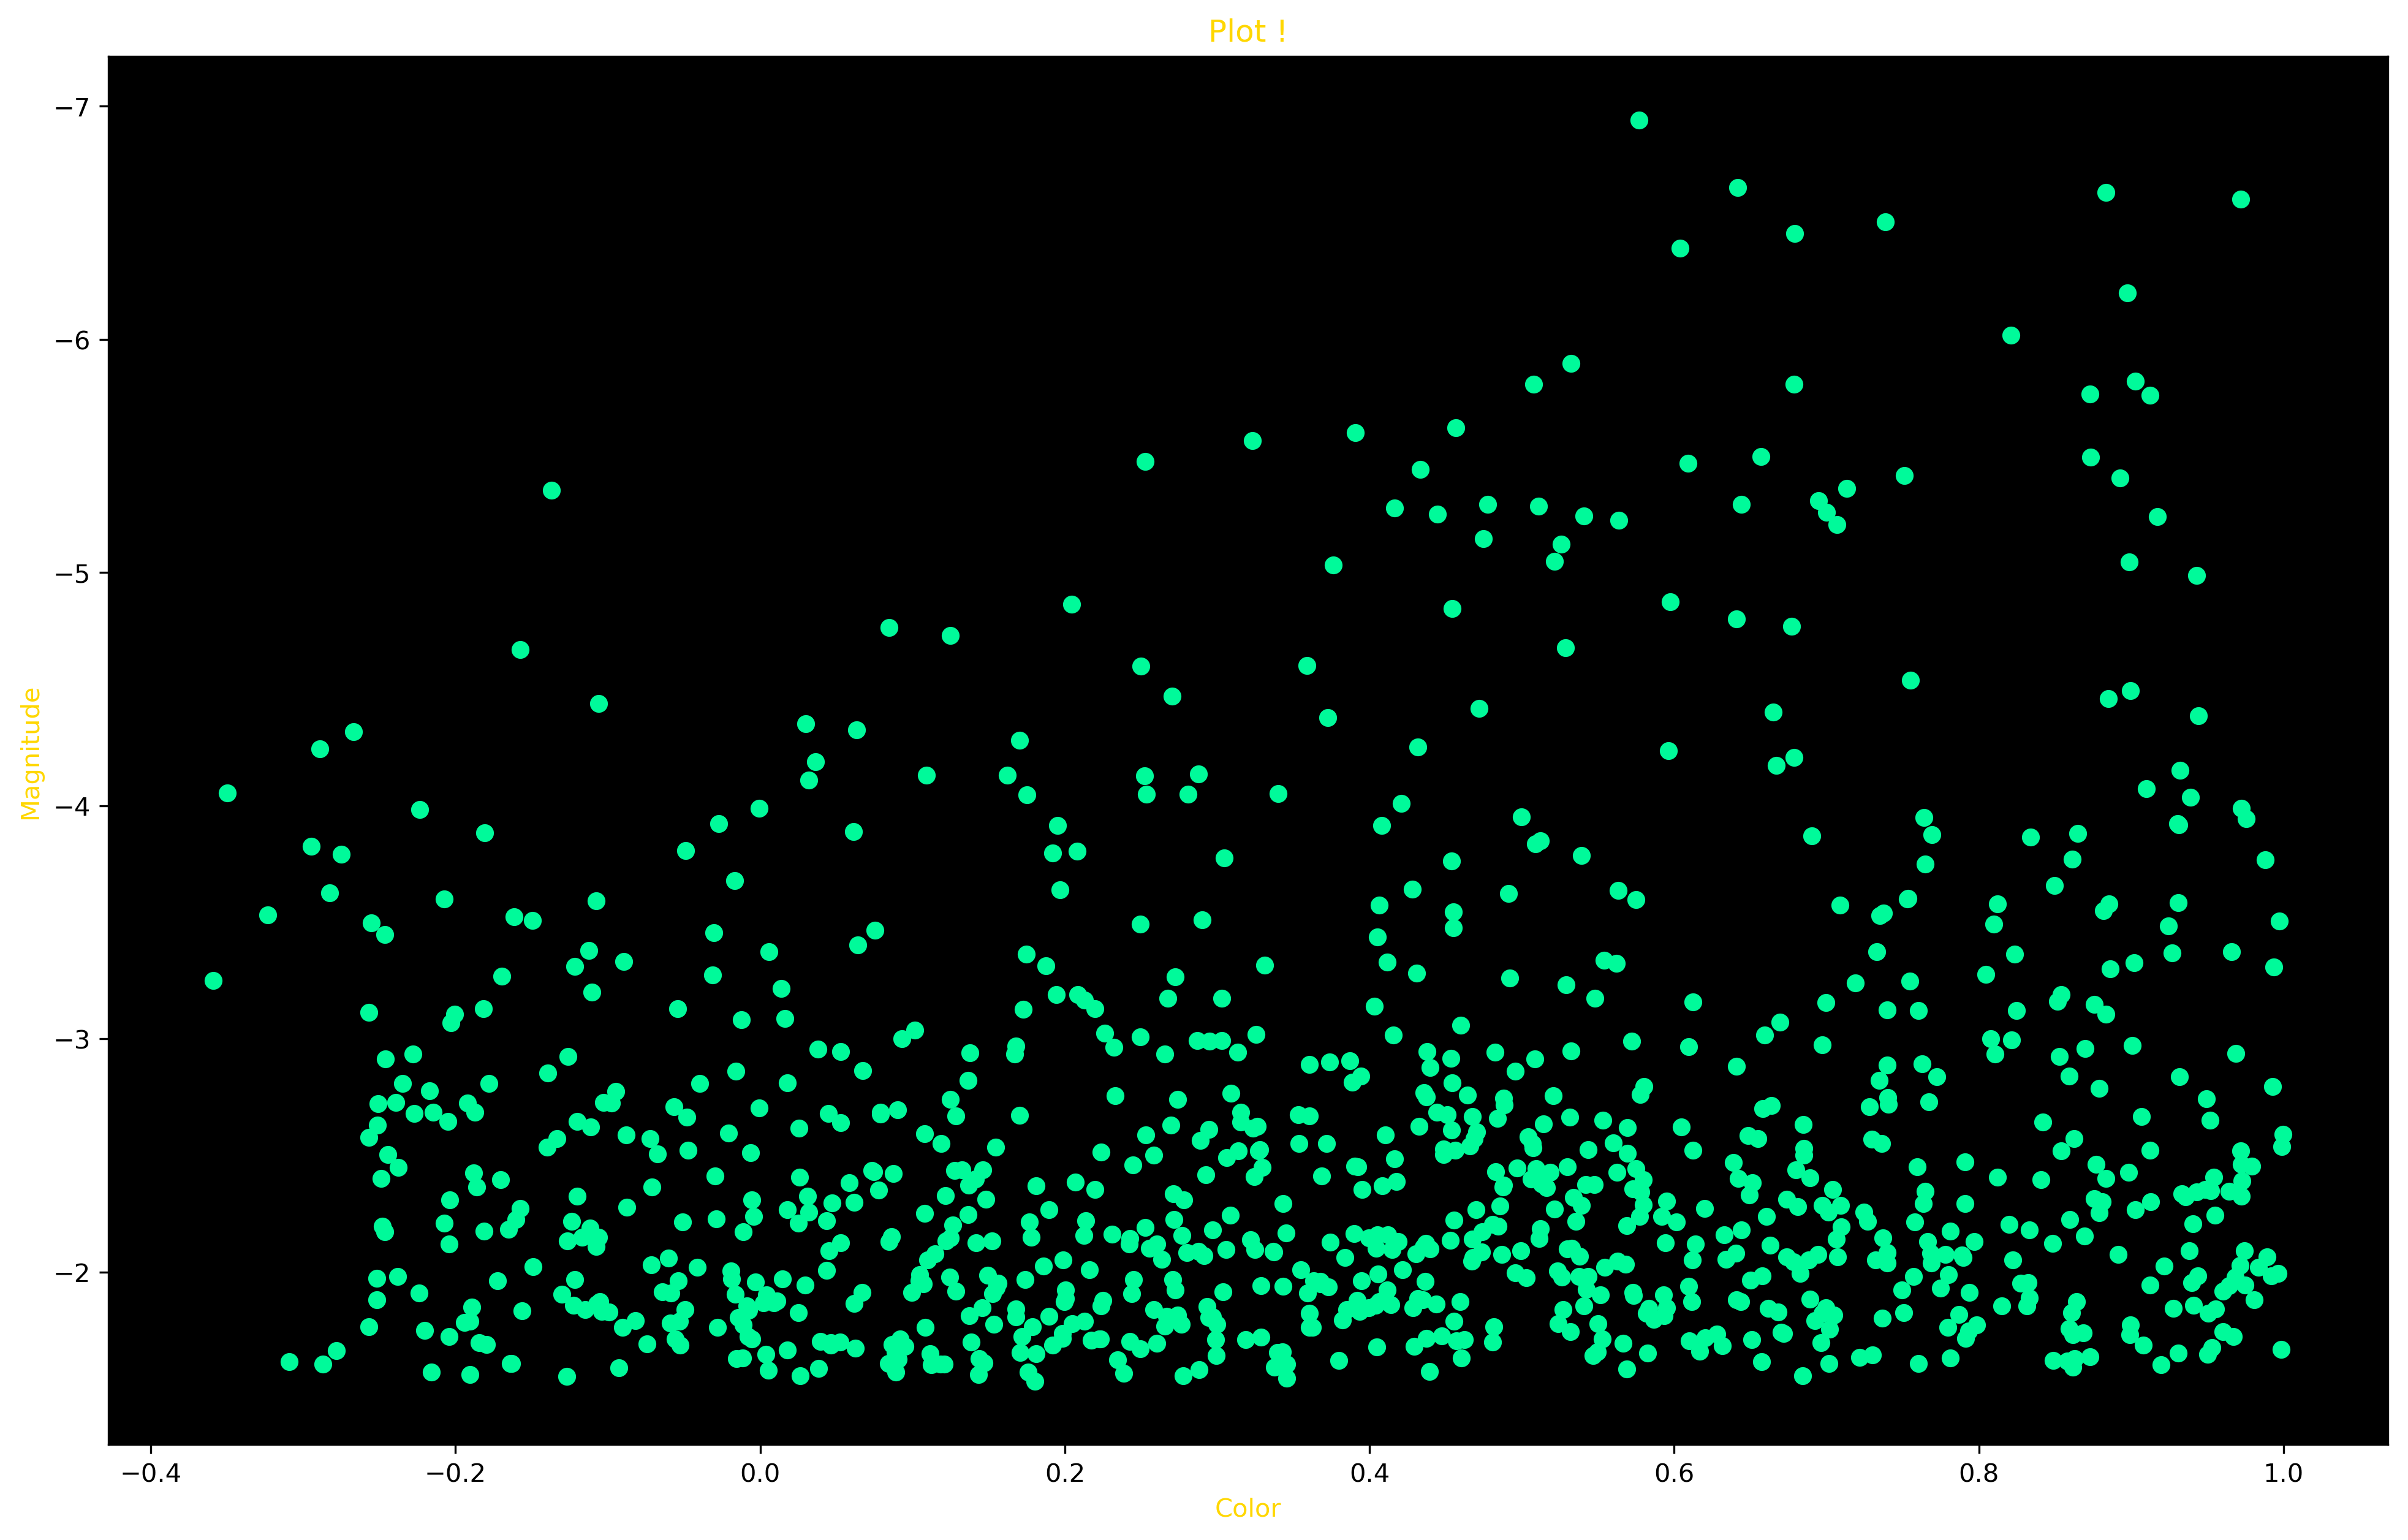

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10),dpi=300)
axes.set_title("Plot !",color='Gold')
axes.set_xlabel("Color",color='gold') 
axes.set_ylabel("Magnitude", color='gold') 
axes.invert_yaxis()
    #plt.figure(facecolor='Black')
axes.set_facecolor('Black')
axes.scatter(x,y,color='mediumspringgreen')

In [11]:
# Import the tool
from gaiaxpy import calibrate
import pylab as lab
import sys
import time
from specutils import Spectrum1D
import astropy.units as u
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = "XP_CONTINUOUS_RAW.csv"
calibrated_spectra, sampling = calibrate(f)
wave = sampling
flux = calibrated_spectra["flux"]

ModuleNotFoundError: No module named 'gaiaxpy'

In [ ]:
plt.plot(wave,flux[0])

In [ ]:
from astropy import constants as const

CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5

waves=wave
fluxs=flux[0]
guassFactor = 25

spec1d = Spectrum1D(spectral_axis=waves*u.AA, flux = fluxs*u.Jy)

spec1_bsmooth = box_smooth(spec1d, width=3)
spec1_gsmooth = gaussian_smooth(spec1d, stddev=guassFactor)
spec1_tsmooth = trapezoid_smooth(spec1d, width=3)

In [ ]:

#print(Focus)
# global title
# global waveG
# global fluxG
#focus=Focus


leftLim = 360
rightLim = 1043
lw = 0.5
V= Gaia_Result["radial_velocity"]
starGuess = "IDK!"
x = wave
Y=flux*(1+V/(const.c.cgs))
y=Y[1]
fig = plt.figure(figsize=(24, 7),dpi=300)
axes=fig.gca()
axes.set_title("I don't know",color='Gold')
axes.set_xlabel("Wave",color='gold') 
axes.set_ylabel("Flux", color='gold') 
plt.figure(facecolor='Black')
axes.set_facecolor('Black')



axes.axvline(x=CaTriplet3Wave,color="magenta",linewidth=lw)#Ca Triplet 3

axes.axvline(x=CaTriplet2Wave,color="magenta",linewidth=lw)#Ca Triplet 2

axes.axvline(x=CaTriplet1Wave,color="magenta",linewidth=lw)#Ca Triplet 1

axes.text(862,np.mean(y[0]),"Ca Triplet" ,fontweight='bold',color ="magenta")

axes.axvline(x=H_AlphaWave,color="violet",linewidth=lw,)#Ha
axes.text(656.5,np.mean(y[0]), " H-α",color="violet")

axes.axvline(x=NaDoublet2Wave,color="deepskyblue",linewidth=lw)#Na Doublet 2
axes.axvline(x=NaDoublet1Wave,color="deepskyblue",linewidth=lw)#Na Doublet 1
axes.text(590,np.mean(y[0]),"Na Doublet", color ="deepskyblue")

axes.axvline(x=H_BetaWave,color="lime",linewidth=lw)#Hb
axes.text(486.5,np.mean(y[0]), "H-β", color="lime")

axes.axvline(x=H_GammaWave,color="darkgoldenrod",linewidth=lw)#Hg
axes.text(434.2,np.mean(y[0]), "H-γ", color="darkgoldenrod") 

axes.axvline(x=G_BandWave,color="Red",linewidth=lw)# G-Band(?)
    
axes.text(408.0,np.mean(y[0]),"G-band",color="Red") # double check this is actually the g-band
   

axes.axvline(x=FeWave,color="coral",linewidth=lw)#Fe
axes.text(433,np.mean(y[0]),"Fe 432.5",color="coral") 
axes.set_xlim(leftLim,rightLim)
axes.plot(x,y)


plt.show

#return waveG 
#return fluxG
#return lw
#return title

In [ ]:
x
y

In [ ]:
x


In [ ]:
Y

In [ ]:
b=950
w = np.empty([951])
while b>-1:
    w[b]=np.isfinite(np.sum(Y[b]))
    if np.isfinite(np.sum(Y[b])) == True:
        print(b)
    b=b-1
    
    w.size
